# 1. Build an object detection model using pytorch

- 1. load csv file
- 2. split csv:slpit the train to train and valid in the ratio of 0.85:0.15
- 3. Plot image
- 4. create dataset
- 1. Create custom database
- 2. Create Dataloader
- 3. Create Model

1.load csv file

In [29]:
import pandas as pd
from pandas import DataFrame as df
df= pd.read_csv("/home/xin/Homework_Week5/Homework_Week10_project2/Cow_stall_number/Train.csv")
df_test= pd.read_csv("/home/xin/Homework_Week5/Homework_Week10_project2/Cow_stall_number/Test.csv")
df.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)

In [30]:
df.head()

,imageFilename,box_position_1,box_position_2,box_position_3,box_position_4,class_names
0,GH030066_4679.png,287.0,116.0,25.0,23.0,29
1,GH020058_19383.png,275.0,58.0,23.0,24.0,44
2,GH030061_1269.png,306.0,74.0,26.0,25.0,13
3,GH020058_17235.png,0.0,0.0,0.0,0.0,0
4,GH020058_18319.png,288.0,55.0,23.0,23.0,42


In [31]:

#transfer the float to int
df['box_position_1'] = df['box_position_1'].astype(int)
df['box_position_2'] = df['box_position_2'].astype(int)
df['box_position_3'] = df['box_position_3'].astype(int)
df['box_position_4'] = df['box_position_4'].astype(int)
df_test['box_position_1'] = df_test['box_position_1'].astype(int)
df_test['box_position_2'] = df_test['box_position_2'].astype(int)
df_test['box_position_3'] = df_test['box_position_3'].astype(int)
df_test['box_position_4'] = df_test['box_position_4'].astype(int)

In [32]:
df_test.head()

,imageFilename,box_position_1,box_position_2,box_position_3,box_position_4,class_names
0,GH030061_12040.png,172,81,25,24,28
1,GH030072_2783.png,289,94,23,21,42
2,GH010059_45.png,0,0,0,0,0
3,GH030072_4929.png,288,94,23,23,46
4,GH020072_31411.png,0,0,0,0,0


In [33]:
df.dtypes, df_test.dtypes

(imageFilename     object
 box_position_1     int64
 box_position_2     int64
 box_position_3     int64
 box_position_4     int64
 class_names        int64
 dtype: object,
 imageFilename     object
 box_position_1     int64
 box_position_2     int64
 box_position_3     int64
 box_position_4     int64
 class_names        int64
 dtype: object)

In [34]:
#check the null value
df.isnull().sum()



imageFilename     0
box_position_1    0
box_position_2    0
box_position_3    0
box_position_4    0
class_names       0
dtype: int64

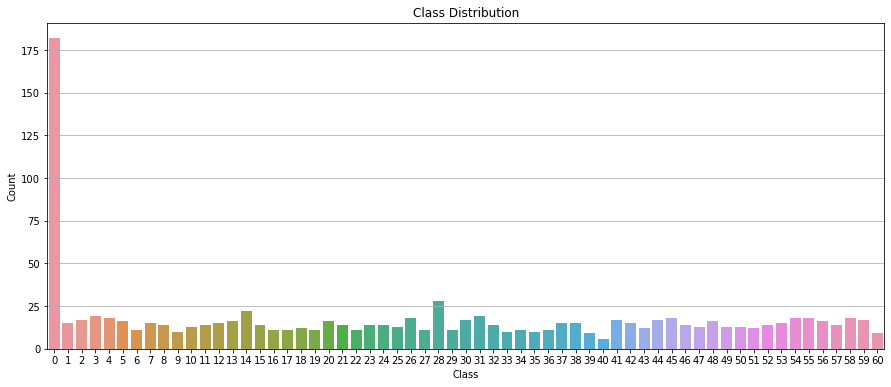

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns



def plot_category(df):
    class_counts = df['class_names'].value_counts().sort_index()


    classes = list(range(0, 61))


    complete_class_counts = pd.DataFrame(index=classes, columns=['count']).fillna(0)

    for cls in class_counts.index:
        complete_class_counts.at[cls, 'count'] = class_counts[cls]

    plt.figure(figsize=(15, 6))
    sns.barplot(x=complete_class_counts.index, y=complete_class_counts['count'])
    plt.title('Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(range(0, 61)) 
    plt.grid(axis='y')
    plt.show()

plot_category(df)


In the train and test CSV files, it contains the image name, stall number box location, and its number label.

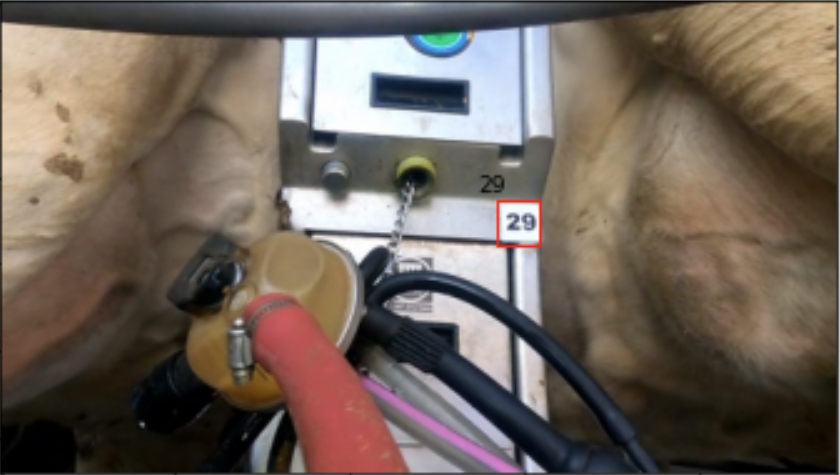

In [36]:
from PIL import Image
image=Image.open("/home/xin/Homework_Week5/Homework_Week10_project2/Cow_stall_number/example.png")
image.show()

2.split csv:slpit the train to train and valid in the ratio of 0.85:0.15

In [37]:
from sklearn.model_selection import train_test_split
import os

train_df, val_df = train_test_split(df, test_size=0.15, random_state=42, stratify=df['class_names'])


def get_image_size(filename):
    with Image.open(filename) as img:
        return img.size
    
def update_size(df, path_image):
 
    widths = []
    heights = []

    for file in df['imageFilename']:
        file_path = os.path.join(path_image, file)

        try:
            with Image.open(file_path) as img:
                width, height = img.size
        except FileNotFoundError:

            width, height = None, None

        widths.append(width)
        heights.append(height)

    df['width'] = widths
    df['height'] = heights
    return df


def format_data(df, path_image):
    formatted_df = update_size(df, path_image)
    data = {
        "xmin": formatted_df["box_position_1"],
        "ymin": formatted_df["box_position_2"],
        "xmax": formatted_df["box_position_3"]+formatted_df["box_position_1"],
        "ymax": formatted_df["box_position_4"]+formatted_df["box_position_2"],
        "class": formatted_df["class_names"],
        "file": path_image + "/"+formatted_df["imageFilename"],
        "width": formatted_df["width"],
        "height": formatted_df["height"],
    }
    return pd.DataFrame(data)

path_image = "/home/xin/Homework_Week5/Homework_Week10_project2/Stall_num_images/Stall_num_images"


train_data = format_data(train_df, path_image)
val_data = format_data(val_df, path_image)
test_data = format_data(df_test, path_image)

train_data.head(), val_data.head() , test_data.head() 

/home/xin/miniconda3/envs/pytorch_nn/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/xin/miniconda3/envs/pytorch_nn/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(     xmin  ymin  xmax  ymax  class  \
 288   193    78   216   100     31   
 444     0     0     0     0      0   
 323   262    57   286    79     40   
 650   275    52   298    74      3   
 203   292    50   318    72     24   
 
                                                   file  width  height  
 288  /home/xin/Homework_Week5/Homework_Week10_proje...    480     270  
 444  /home/xin/Homework_Week5/Homework_Week10_proje...    480     270  
 323  /home/xin/Homework_Week5/Homework_Week10_proje...    480     270  
 650  /home/xin/Homework_Week5/Homework_Week10_proje...    480     270  
 203  /home/xin/Homework_Week5/Homework_Week10_proje...    480     270  ,
       xmin  ymin  xmax  ymax  class  \
 592      0     0     0     0      0   
 1001   276   118   300   139     47   
 370    324    69   351    94      3   
 847    279    57   302    81     44   
 177    288    54   313    79      2   
 
                                                    file  width  height  
 592   /h

3.Plot image

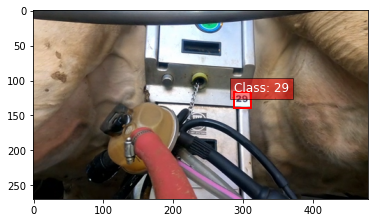

In [38]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

example_image_path = '/home/xin/Homework_Week5/Homework_Week10_project2/Stall_num_images/Stall_num_images/GH030066_4679.png' 
example_bbox = [287,116,25,	23]  
example_class = 29  


img = Image.open(example_image_path)
plt.imshow(img)

rect = patches.Rectangle((example_bbox[0], example_bbox[1]), example_bbox[2], example_bbox[3], 
                         linewidth=2, edgecolor='r', facecolor='none')

plt.gca().add_patch(rect)
plt.text(example_bbox[0], example_bbox[1], f'Class: {example_class}', color='white', fontsize=12, 
         bbox=dict(facecolor='red', alpha=0.5))

plt.show()

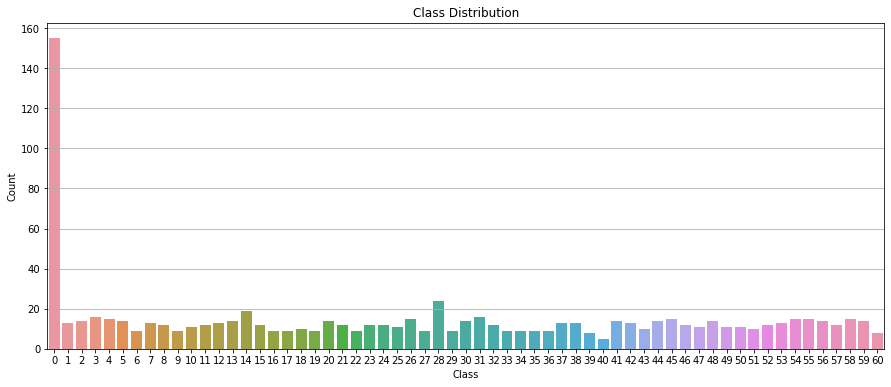

In [39]:
plot_category(train_df)

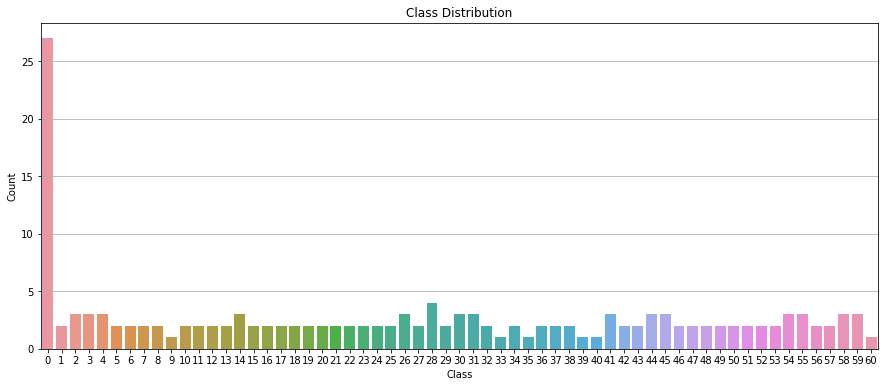

In [40]:
plot_category(val_df)

In [41]:
print("test:",len(test_data),"train:",len(train_data),"val:",len(val_data), "train/(train+val):",len(train_data)/(len(val_data)+len(train_data)))


test: 261 train: 885 val: 157 train/(train+val): 0.8493282149712092


In [42]:
train_data = train_data.reset_index(drop=True)
val_data = val_data.reset_index(drop=True)
train_data

,xmin,ymin,xmax,ymax,class,file,width,height
0,193,78,216,100,31,/home/xin/Homework_Week5/Homework_Week10_proje...,480,270
1,0,0,0,0,0,/home/xin/Homework_Week5/Homework_Week10_proje...,480,270
2,262,57,286,79,40,/home/xin/Homework_Week5/Homework_Week10_proje...,480,270
3,275,52,298,74,3,/home/xin/Homework_Week5/Homework_Week10_proje...,480,270
4,292,50,318,72,24,/home/xin/Homework_Week5/Homework_Week10_proje...,480,270
...,...,...,...,...,...,...,...,...
880,274,56,297,79,48,/home/xin/Homework_Week5/Homework_Week10_proje...,480,270
881,288,94,313,116,26,/home/xin/Homework_Week5/Homework_Week10_proje...,480,270
882,284,118,308,140,14,/home/xin/Homework_Week5/Homework_Week10_proje...,480,270
883,0,0,0,0,0,/home/xin/Homework_Week5/Homework_Week10_proje...,480,270


In [43]:
data=train_data['file'].unique()
data=train_data.iloc[:, 5].unique()
data[0]

'/home/xin/Homework_Week5/Homework_Week10_project2/Stall_num_images/Stall_num_images/GH010064_10272.png'

In [44]:
len(train_data.iloc[:, 4].unique()), train_data.iloc[0, 5],train_data.iloc[0]

(61,
 '/home/xin/Homework_Week5/Homework_Week10_project2/Stall_num_images/Stall_num_images/GH010064_10272.png',
 xmin                                                    193
 ymin                                                     78
 xmax                                                    216
 ymax                                                    100
 class                                                    31
 file      /home/xin/Homework_Week5/Homework_Week10_proje...
 width                                                   480
 height                                                  270
 Name: 0, dtype: object)

4.create dataset

In [45]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

# P2 Dataset
class Traindata(Dataset):
    def __init__(self, dataframe, transform=None):
        """
        Args:
            dataframe (DataFrame)
            transform (callable, optional)
        """
        self.dataframe = dataframe.fillna(0)
        self.to_tensor = transforms.ToTensor()
        self.image_ids = dataframe.iloc[:, 5].unique()
        # self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx:int):

        #get current row
        data_row = self.dataframe.iloc[idx]

        #image
        img_name = data_row['file']
        image = Image.open(img_name).convert("RGB")
        image = self.to_tensor(image)


        #bbox,label,area,iscrowd
        if data_row[['xmin', 'ymin', 'xmax', 'ymax']].eq(0).any():

            bbox = torch.zeros((0, 4), dtype=torch.int32)
            labels = torch.zeros((0,), dtype=torch.int64)
            area = torch.zeros((0,), dtype=torch.int32)
            iscrowd = torch.zeros((0,), dtype=torch.int32)
        else:

            xmin, ymin, xmax, ymax = data_row['xmin'], data_row['ymin'], data_row['xmax'], data_row['ymax']
            bbox = torch.tensor([[xmin, ymin, xmax, ymax]])
            label = data_row['class']
            labels = torch.tensor([label], dtype=torch.int64)
            area = torch.tensor([(xmax - xmin) * (ymax - ymin)], dtype=torch.int32)
            iscrowd = torch.zeros((1,), dtype=torch.int32)

        #target contains bbox,labels,image_id,area,iscrowd
        target = {
            'boxes': bbox,
            'labels': labels,
            'image_id': torch.tensor([idx]),
            'area': area,
            'iscrowd': iscrowd
        }

        #get current image id
        image_ids = self.image_ids[idx]
        
        # assert isinstance(target, dict), "target must be a dictionary"
        
        # if not isinstance(target, dict):
        #     print(f"Error at idx {idx}: target is not a dict, target={target}")
    
        # if self.transform:
        #     sample['image'] = self.transform(sample['image'])

        return image, target, image_ids

train_dataset = Traindata(dataframe=train_data, transform=None)
val_dataset = Traindata(dataframe=val_data, transform=None)
test_dataset = Traindata(dataframe=test_data, transform=None)

In [46]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def show_image_with_boxes_and_labels(dataset, idx):

    image, target, image_id = dataset[idx]

    img = transforms.ToPILImage()(image).convert("RGB")


    plt.imshow(img)

    for i, box in enumerate(target['boxes']):
        xmin, ymin, xmax, ymax = box
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)

        label = target['labels'][i].item()  
        plt.text(xmax+10, ymin, str(label), color='white', fontsize=12, backgroundcolor='red')

    plt.show()

In [47]:
train_dataset[1]

(tensor([[[0.9725, 0.9490, 0.9255,  ..., 0.9451, 0.9490, 0.9490],
          [0.9608, 0.9373, 0.9255,  ..., 0.9490, 0.9569, 0.9569],
          [0.9373, 0.9255, 0.9216,  ..., 0.9647, 0.9725, 0.9725],
          ...,
          [0.0941, 0.0941, 0.0941,  ..., 0.0196, 0.0275, 0.0314],
          [0.0941, 0.0941, 0.0941,  ..., 0.0000, 0.0000, 0.0118],
          [0.0941, 0.0941, 0.0941,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.8941, 0.8706, 0.8471,  ..., 0.9961, 0.9922, 0.9922],
          [0.8824, 0.8627, 0.8471,  ..., 0.9922, 0.9961, 0.9961],
          [0.8627, 0.8471, 0.8431,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.0784, 0.0784, 0.0784,  ..., 0.0471, 0.0549, 0.0588],
          [0.0784, 0.0784, 0.0784,  ..., 0.0000, 0.0157, 0.0353],
          [0.0784, 0.0784, 0.0784,  ..., 0.0157, 0.0196, 0.0118]],
 
         [[0.8196, 0.8000, 0.7765,  ..., 1.0000, 1.0000, 1.0000],
          [0.8118, 0.7882, 0.7765,  ..., 1.0000, 1.0000, 1.0000],
          [0.7882, 0.7765, 0.7725,  ...,

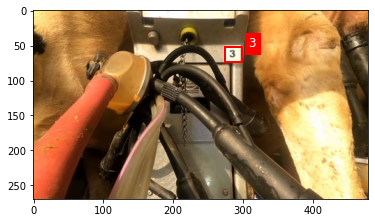

In [48]:
index_to_show = 3  
show_image_with_boxes_and_labels(train_dataset, index_to_show)

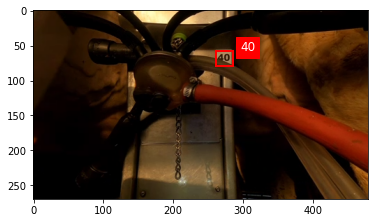

In [49]:
index_to_show = 2  
show_image_with_boxes_and_labels(train_dataset, index_to_show)

In [50]:
test_dataset[3]

(tensor([[[0.8784, 0.9020, 0.9098,  ..., 0.6039, 0.5882, 0.6118],
          [0.9020, 0.9137, 0.9255,  ..., 0.6157, 0.6078, 0.6078],
          [0.9373, 0.9373, 0.9569,  ..., 0.6078, 0.6078, 0.5961],
          ...,
          [0.4784, 0.4824, 0.4667,  ..., 0.0118, 0.0118, 0.0157],
          [0.5255, 0.4745, 0.4784,  ..., 0.0078, 0.0118, 0.0118],
          [0.4941, 0.4588, 0.4941,  ..., 0.0078, 0.0118, 0.0118]],
 
         [[0.8235, 0.8431, 0.8549,  ..., 0.4980, 0.4863, 0.5059],
          [0.8431, 0.8588, 0.8667,  ..., 0.5137, 0.5020, 0.5020],
          [0.8824, 0.8824, 0.8980,  ..., 0.5098, 0.5020, 0.4902],
          ...,
          [0.4235, 0.4275, 0.4078,  ..., 0.0039, 0.0039, 0.0078],
          [0.4706, 0.4196, 0.4235,  ..., 0.0000, 0.0039, 0.0039],
          [0.4392, 0.4078, 0.4392,  ..., 0.0000, 0.0039, 0.0039]],
 
         [[0.7882, 0.8118, 0.8196,  ..., 0.3725, 0.3608, 0.3804],
          [0.8118, 0.8235, 0.8353,  ..., 0.3882, 0.3765, 0.3765],
          [0.8471, 0.8471, 0.8667,  ...,

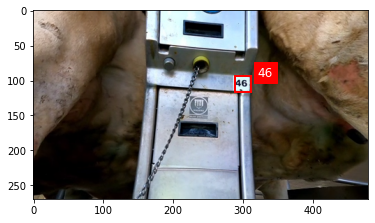

In [51]:
index_to_show = 3  
show_image_with_boxes_and_labels(test_dataset, index_to_show)

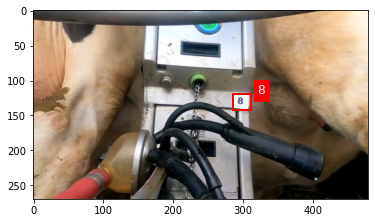

In [52]:
index_to_show = 5
show_image_with_boxes_and_labels(test_dataset, index_to_show)

In [53]:
val_dataset[3]

(tensor([[[0.6196, 0.6157, 0.6157,  ..., 1.0000, 1.0000, 1.0000],
          [0.6196, 0.6157, 0.6157,  ..., 1.0000, 1.0000, 1.0000],
          [0.6196, 0.6157, 0.6078,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.0706, 0.0706, 0.0706,  ..., 0.2235, 0.2235, 0.2275],
          [0.0588, 0.0588, 0.0588,  ..., 0.2235, 0.2275, 0.2275],
          [0.0549, 0.0549, 0.0549,  ..., 0.2235, 0.2235, 0.2275]],
 
         [[0.3412, 0.3412, 0.3451,  ..., 0.8863, 0.8745, 0.8902],
          [0.3412, 0.3412, 0.3451,  ..., 0.8824, 0.8824, 0.8824],
          [0.3412, 0.3412, 0.3373,  ..., 0.8706, 0.8824, 0.8706],
          ...,
          [0.0510, 0.0510, 0.0510,  ..., 0.1765, 0.1765, 0.1804],
          [0.0392, 0.0392, 0.0392,  ..., 0.1765, 0.1804, 0.1804],
          [0.0353, 0.0353, 0.0353,  ..., 0.1765, 0.1765, 0.1804]],
 
         [[0.1765, 0.1765, 0.1765,  ..., 0.5294, 0.5216, 0.5373],
          [0.1804, 0.1804, 0.1804,  ..., 0.5255, 0.5294, 0.5294],
          [0.1843, 0.1843, 0.1765,  ...,

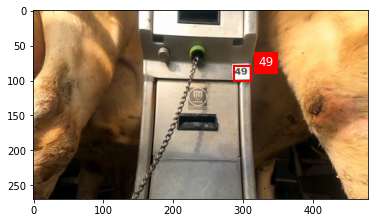

In [54]:
index_to_show = 5
show_image_with_boxes_and_labels(val_dataset, index_to_show)

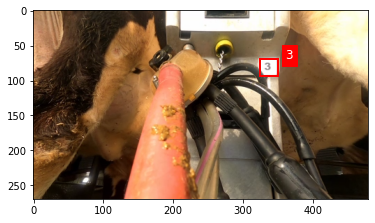

In [55]:
index_to_show = 2
show_image_with_boxes_and_labels(val_dataset, index_to_show)

In [56]:
import torch.nn.functional as F

def custom_collate_fn(batch):
    images, targets, image_ids = zip(*batch)
    
    if not images:
        raise RuntimeError('The list of images is empty.')

    # Remove empty placeholder targets
    max_size = tuple(max(sizes) for sizes in zip(*[image.shape for image in images]))

    # Now, pad the images to the max size
    images_padded = [F.pad(image, (0, max_size[2] - image.size(2), 0, max_size[1] - image.size(1))) for image in images]

    # Stack images into a single tensor
    images_tensor = torch.stack(images_padded)
    return images_tensor, targets, image_ids


In [57]:
#define data loader
train_loader = DataLoader(dataset=train_dataset, batch_size=2, shuffle=True,collate_fn=custom_collate_fn)
val_loader = DataLoader(dataset=val_dataset, batch_size=2, shuffle=True,  collate_fn=custom_collate_fn)
test_loader = DataLoader(dataset=test_dataset, batch_size=2, shuffle=True, collate_fn=custom_collate_fn)

In [58]:
from torchvision import transforms
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image


transform = transforms.Compose([
   
    transforms.ToTensor()
])

def load_image_and_boxes(batch_index_to_display, train_loader):

    for i, (images, targets, image_ids) in enumerate(train_loader):
        if i == batch_index_to_display:
      
            for j in range(len(images)):
                img = transforms.ToPILImage()(images[j]).convert("RGB")
                plt.imshow(img)

            
                for k, box in enumerate(targets[j]['boxes']):
                    xmin, ymin, xmax, ymax = box
                    rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none')
                    plt.gca().add_patch(rect)

         
                    label = targets[j]['labels'][k].item()
                    plt.text(xmax+10, ymin, str(label), color='white', fontsize=12, backgroundcolor='red')

                plt.show()

            break  

In [59]:
next(iter(train_loader))

(tensor([[[[0.9373, 0.9137, 0.9098,  ..., 0.8706, 0.8627, 0.8549],
           [0.9373, 0.9176, 0.9059,  ..., 0.8667, 0.8745, 0.8863],
           [0.8784, 0.8941, 0.9098,  ..., 0.8784, 0.8980, 0.9216],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.3922, 0.2471, 0.1098],
           [0.0000, 0.0000, 0.0000,  ..., 0.5725, 0.5490, 0.3843],
           [0.0000, 0.0000, 0.0000,  ..., 0.4706, 0.5647, 0.4667]],
 
          [[0.8118, 0.7882, 0.7843,  ..., 0.7451, 0.7373, 0.7255],
           [0.8118, 0.7922, 0.7804,  ..., 0.7373, 0.7451, 0.7569],
           [0.7529, 0.7686, 0.7843,  ..., 0.7490, 0.7647, 0.7882],
           ...,
           [0.0039, 0.0039, 0.0039,  ..., 0.3765, 0.2353, 0.1059],
           [0.0039, 0.0039, 0.0039,  ..., 0.5490, 0.5373, 0.3765],
           [0.0078, 0.0039, 0.0039,  ..., 0.4471, 0.5529, 0.4627]],
 
          [[0.6471, 0.6275, 0.6196,  ..., 0.6510, 0.6392, 0.6275],
           [0.6510, 0.6314, 0.6196,  ..., 0.6471, 0.6471, 0.6588],
           [0.5961, 0.61

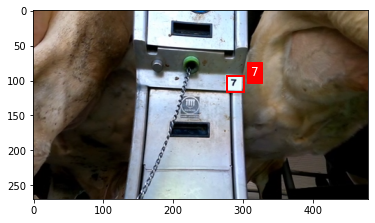

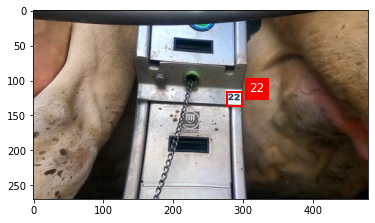

In [60]:
load_image_and_boxes(1, train_loader)

In [61]:
next(iter(val_loader))

(tensor([[[[0.8588, 0.8980, 0.9098,  ..., 0.8863, 0.8784, 0.8627],
           [0.8667, 0.8941, 0.9059,  ..., 0.8784, 0.8824, 0.8745],
           [0.8549, 0.8706, 0.8824,  ..., 0.8745, 0.8784, 0.8745],
           ...,
           [0.5922, 0.5961, 0.6078,  ..., 0.0000, 0.0000, 0.0000],
           [0.5647, 0.5843, 0.5922,  ..., 0.0000, 0.0000, 0.0000],
           [0.5529, 0.5686, 0.5804,  ..., 0.0000, 0.0000, 0.0000]],
 
          [[0.7059, 0.7412, 0.7569,  ..., 0.8118, 0.8118, 0.7961],
           [0.7098, 0.7373, 0.7529,  ..., 0.8039, 0.8157, 0.8078],
           [0.6941, 0.7098, 0.7216,  ..., 0.8000, 0.8118, 0.8078],
           ...,
           [0.5961, 0.6000, 0.6078,  ..., 0.0000, 0.0000, 0.0000],
           [0.5686, 0.5843, 0.5961,  ..., 0.0000, 0.0000, 0.0000],
           [0.5529, 0.5725, 0.5804,  ..., 0.0000, 0.0000, 0.0000]],
 
          [[0.5529, 0.5882, 0.6039,  ..., 0.7294, 0.7255, 0.7137],
           [0.5569, 0.5843, 0.5961,  ..., 0.7216, 0.7294, 0.7216],
           [0.5373, 0.55

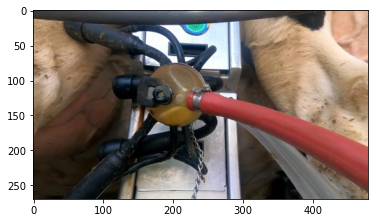

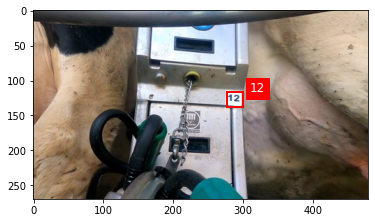

In [62]:
#load the validation data
load_image_and_boxes(1, val_loader)

In [63]:
next(iter(test_loader))

(tensor([[[[0.2000, 0.2000, 0.2039,  ..., 0.8902, 0.8902, 0.8902],
           [0.1882, 0.1882, 0.1882,  ..., 0.8980, 0.8980, 0.8980],
           [0.1804, 0.1804, 0.1804,  ..., 0.9059, 0.9059, 0.9098],
           ...,
           [0.0471, 0.0471, 0.0471,  ..., 0.0706, 0.0706, 0.0627],
           [0.0118, 0.0118, 0.0118,  ..., 0.0667, 0.0667, 0.0667],
           [0.0000, 0.0000, 0.0000,  ..., 0.0667, 0.0706, 0.0706]],
 
          [[0.2078, 0.2078, 0.2118,  ..., 0.8078, 0.8078, 0.8078],
           [0.2000, 0.2000, 0.2000,  ..., 0.8157, 0.8157, 0.8157],
           [0.1882, 0.1882, 0.1882,  ..., 0.8196, 0.8196, 0.8235],
           ...,
           [0.0471, 0.0471, 0.0471,  ..., 0.0667, 0.0667, 0.0549],
           [0.0157, 0.0157, 0.0157,  ..., 0.0588, 0.0588, 0.0588],
           [0.0000, 0.0000, 0.0000,  ..., 0.0588, 0.0667, 0.0667]],
 
          [[0.2039, 0.2039, 0.2118,  ..., 0.7176, 0.7176, 0.7176],
           [0.1961, 0.1961, 0.1961,  ..., 0.7294, 0.7294, 0.7294],
           [0.1882, 0.18

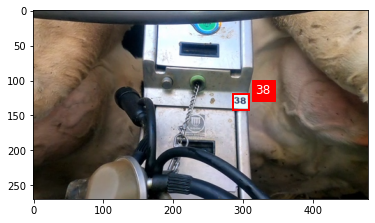

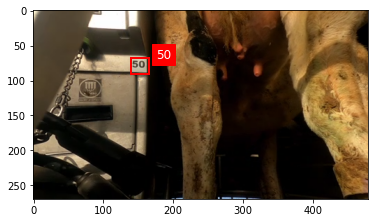

In [64]:
#load the test data
load_image_and_boxes(1, test_loader)

create model

In [69]:
import torch
import torch.nn as nn
from torchvision.models import resnet50
from torchvision.models.detection.anchor_utils import AnchorGenerator

from torchvision.ops import MultiScaleRoIAlign, roi_align
from torchvision.models.detection.rpn import RPNHead, RegionProposalNetwork
from torchvision.models.detection.roi_heads import RoIHeads
from torchvision.models.detection.transform import GeneralizedRCNNTransform

class Backbone(nn.Module):
    def __init__(self):
        super().__init__()

        resnet = resnet50(pretrained=True)

        modules = list(resnet.children())[:-2]
        self.backbone = nn.Sequential(*modules)

        self.out_channels = resnet.fc.in_features
    
    def forward(self, x):
        return self.backbone(x)


class FasterRCNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        backbone = Backbone()

        # Anchor generator
        anchor_generator = AnchorGenerator(
            sizes=((32,), (64,), (128,), (256,), (512,)),
            aspect_ratios=((0.5, 1.0, 2.0),) * 5)

        # RPN
        rpn_head = RPNHead(backbone.out_channels, anchor_generator.num_anchors_per_location()[0])
        rpn = RegionProposalNetwork(
            anchor_generator, rpn_head,
            fg_iou_thresh=0.7, bg_iou_thresh=0.3,
            batch_size_per_image=256, positive_fraction=0.5,
            pre_nms_top_n={'training': 2000, 'testing': 1000},
            post_nms_top_n={'training': 2000, 'testing': 1000},
            nms_thresh=0.7)

        # RoI heads
        box_roi_pool = MultiScaleRoIAlign(
            featmap_names=['0'], output_size=7, sampling_ratio=2)
        box_head = nn.Sequential(
            nn.Flatten(),
            nn.Linear(backbone.out_channels * 7 * 7, 4096),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout())
        box_predictor = nn.Linear(4096, num_classes)
        
        roi_heads = RoIHeads(
            # The box_roi_pool, box_head and box_predictor
            box_roi_pool, box_head, box_predictor,
            # The detection and classification thresholds
            fg_iou_thresh=0.5, bg_iou_thresh=0.5,
            batch_size_per_image=128, positive_fraction=0.25,
            bbox_reg_weights=None,
            score_thresh=0.05, nms_thresh=0.5, detections_per_img=100)

        # Image transformation
        transform = GeneralizedRCNNTransform(min_size=800, max_size=1333,
                                             image_mean=[0.485, 0.456, 0.406],
                                             image_std=[0.229, 0.224, 0.225])

        self.model = nn.Sequential(transform, backbone, rpn, roi_heads)

    def forward(self, images, targets=None):
        return self.model(images, targets)

model = FasterRCNN(num_classes=61)


# 2. Train your model using [cow stall number datas](https://github.com/YoushanZhang/Cow_stall_number)

1.set pretain model and optimizer
2.set hyperprameter
3.train, validation and save model
4.load model
5.run test file and save results
6.show results image
7.write research paper 

1.set pretain model and optimizer


In [37]:
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

# num_classes = 61 
# in_features = model.roi_heads.box_predictor.cls_score.in_features

# model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)


2.set hyperprameter


In [38]:
import torch

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model.to(device)

params = [p for p in model.parameters() if p.requires_grad]

optimizer = torch.optim.SGD(params, lr=0.001, momentum=0.9,weight_decay=0.0005)
# optimizer = torch.optim.Adam(params, lr=0.0008, weight_decay=0.0005)
lr_scheduler = None


In [39]:
def load_pretrain_frcnn_model(filename):
    # model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

    # num_classes = 61 
    # in_features = model.roi_heads.box_predictor.cls_score.in_features

    # model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    model = FasterRCNN(num_classes=61)
    model.load_state_dict(torch.load(filename))
    return model.to(device)

In [40]:
def iou(box1, box2):

    x1, y1, x2, y2 = box1
    x1_p, y1_p, x2_p, y2_p = box2


    xi1 = max(x1, x1_p)
    yi1 = max(y1, y1_p)
    xi2 = min(x2, x2_p)
    yi2 = min(y2, y2_p)


    inter_area = max(xi2 - xi1, 0) * max(yi2 - yi1, 0)


    box1_area = (x2 - x1) * (y2 - y1)
    box2_area = (x2_p - x1_p) * (y2_p - y1_p)


    union_area = box1_area + box2_area - inter_area
    iou = inter_area / union_area

    return iou

In [41]:
def train_epoch(epoch_index):
    model.train()
    running_loss = 0.0
    for images, targets, _ in train_loader:
        images = [image.to(device) for image in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        optimizer.zero_grad()

        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())

        losses.backward()
        optimizer.step()

        running_loss += losses.item()

    return running_loss / len(train_loader)

In [42]:
def validate():
    model.eval()
    total = 0
    correct = 0
    iou_threshold = 0.5  

    with torch.no_grad():
        for images, targets, _ in val_loader:
            images = list(image.to(device) for image in images)
            outputs = model(images)

            for i in range(len(images)):
               
                pred_boxes = outputs[i]['boxes']
                pred_labels = outputs[i]['labels']
                target_boxes = targets[i]['boxes']
                target_labels = targets[i]['labels']

                if len(pred_boxes) > 0 and len(target_boxes) > 0:
                    pred_box = pred_boxes[0].cpu().numpy() 
                    target_box = target_boxes[0].cpu().numpy()
                    pred_label = pred_labels[0].cpu().numpy()
                    target_label = target_labels[0].cpu().numpy()

                    if iou(pred_box, target_box) >= iou_threshold and pred_label == target_label:
                        correct += 1

                total += 1

    accuracy = correct / total
    return accuracy

In [43]:
def train_frcnn(num_epochs):
    train_losses = []
    val_accuracies = []
    val_accuracy = 0.0
    for epoch in range(num_epochs):
        train_loss = train_epoch(epoch)
        val_accuracy = validate()
        # lr_scheduler.step()
        train_losses.append(train_loss)
        val_accuracies.append(val_accuracy)
        print(f'Epoch {epoch}, Train Loss: {train_loss}, Validation IOU: {val_accuracy}')
        if epoch % 5 == 0:
            torch.save(model.state_dict(), f'faster_rcnn_{epoch}.pth')
        #save best accuracy model
        if val_accuracy < max(val_accuracies):
            torch.save(model.state_dict(), f'faster_rcnn_best_sgd.pth')
            val_accuracy = max(val_accuracies)


    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss')

    plt.subplot(1, 2, 2)
    plt.plot(val_accuracies, label='Validation IOU')
    plt.xlabel('Epochs')
    plt.ylabel('IOU Accuracy')
    plt.title('Validation IOU')

    plt.show()

/home/xin/miniconda3/envs/pytorch_nn/lib/python3.6/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1640811805959/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Epoch 0, Train Loss: 0.4311086060561875, Validation IOU: 0.0
Epoch 1, Train Loss: 0.43462306882923174, Validation IOU: 0.03184713375796178
Epoch 2, Train Loss: 0.3625518803221262, Validation IOU: 0.03821656050955414
Epoch 3, Train Loss: 0.3166423832279707, Validation IOU: 0.07643312101910828
Epoch 4, Train Loss: 0.3092383204682209, Validation IOU: 0.06369426751592357
Epoch 5, Train Loss: 0.3039047155870981, Validation IOU: 0.12101910828025478
Epoch 6, Train Loss: 0.29482840229602414, Validation IOU: 0.15286624203821655
Epoch 7, Train Loss: 0.2728990323393159, Validation IOU: 0.29936305732484075
Epoch 8, Train Loss: 0.24653743579191903, Validation IOU: 0.34394904458598724
Epoch 9, Train Loss: 0.20168212867470497, Validation IOU: 0.5923566878980892
Epoch 10, Train Loss: 0.1677519323651933, Validation IOU: 0.6178343949044586
Epoch 11, Train Loss: 0.1392910002375196, Validation IOU: 0.6878980891719745
Epoch 12, Train Loss: 0.12170441650902789, Validation IOU: 0.7197452229299363
Epoch 13, T

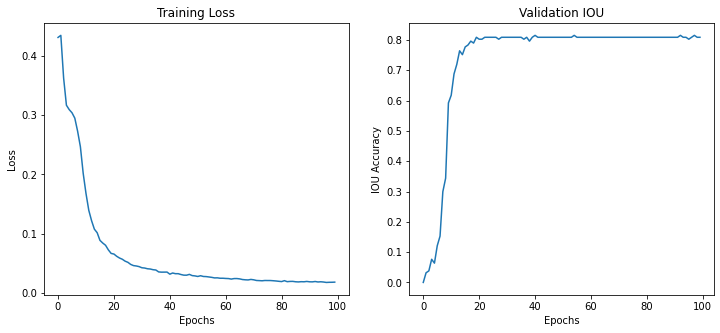

In [44]:
# Adam optimizer,lr=0.0008,batch=16
# lr_scheduler=none
# train the model
num_epochs=100
download_model='faster_rcnn.pth'
# model=load_pretrain_frcnn_model(download_model)
train_frcnn(num_epochs)
torch.save(model.state_dict(), download_model)

Adam optimizer,lr=0.0005,batch=16
without l
Epoch 0, Train Loss: 0.4032799058726856, Validation Accuracy: 0.0
Epoch 1, Train Loss: 0.4043357569192137, Validation Accuracy: 0.0
Epoch 2, Train Loss: 0.4041303587811334, Validation Accuracy: 0.0
Epoch 3, Train Loss: 0.40403364173003603, Validation Accuracy: 0.0

Adam optimizer,lr=0.0005,batch=16
lr_scheduler

/home/xin/miniconda3/envs/pytorch_nn/lib/python3.6/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1640811805959/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Epoch 0, Train Loss: 0.14373994512217386, Validation IOU: 0.7070063694267515
Epoch 1, Train Loss: 0.14355138343359744, Validation IOU: 0.7070063694267515
Epoch 2, Train Loss: 0.14412119212959493, Validation IOU: 0.7070063694267515
Epoch 3, Train Loss: 0.14405841606536082, Validation IOU: 0.7070063694267515
Epoch 4, Train Loss: 0.14338766637125186, Validation IOU: 0.7070063694267515
Epoch 5, Train Loss: 0.14376926382205316, Validation IOU: 0.7070063694267515
Epoch 6, Train Loss: 0.14360282277422293, Validation IOU: 0.7070063694267515
Epoch 7, Train Loss: 0.1440034918487072, Validation IOU: 0.7070063694267515
Epoch 8, Train Loss: 0.1434204237801688, Validation IOU: 0.7070063694267515
Epoch 9, Train Loss: 0.14481003489345312, Validation IOU: 0.7070063694267515
Epoch 10, Train Loss: 0.14350412054253475, Validation IOU: 0.7070063694267515
Epoch 11, Train Loss: 0.14420796598174743, Validation IOU: 0.7070063694267515
Epoch 12, Train Loss: 0.1440721803477832, Validation IOU: 0.7070063694267515
Epoch 13, Train Loss: 0.14349875439490592, Validation IOU: 0.7070063694267515
Epoch 14, Train Loss: 0.14380096524421657, Validation IOU: 0.7070063694267515
Epoch 15, Train Loss: 0.1443062759935856, Validation IOU: 0.7070063694267515
Epoch 16, Train Loss: 0.1436954318944897, Validation IOU: 0.7070063694267515
Epoch 17, Train Loss: 0.14358591993472405, Validation IOU: 0.7070063694267515
Epoch 18, Train Loss: 0.14398680640650646, Validation IOU: 0.7070063694267515
Epoch 19, Train Loss: 0.14417959510215692, Validation IOU: 0.7070063694267515
Epoch 20, Train Loss: 0.14362074567803315, Validation IOU: 0.7070063694267515
Epoch 21, Train Loss: 0.1443226227004613, Validation IOU: 0.7070063694267515
Epoch 22, Train Loss: 0.143274928709226, Validation IOU: 0.7070063694267515

Adam optimizer,lr=0.0008,batch=16
lr_scheduler=none
/home/xin/miniconda3/envs/pytorch_nn/lib/python3.6/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1640811805959/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Epoch 0, Train Loss: 0.3701116806906164, Validation IOU: 0.006369426751592357
Epoch 1, Train Loss: 2.0412401313058512, Validation IOU: 0.0
Epoch 2, Train Loss: 0.1522774474222749, Validation IOU: 0.0
Epoch 3, Train Loss: 0.09891816037465923, Validation IOU: 0.0
Epoch 4, Train Loss: 0.11725447079230233, Validation IOU: 0.0
Epoch 5, Train Loss: 0.13449534267948812, Validation IOU: 0.0
Epoch 6, Train Loss: 0.1304198998873156, Validation IOU: 0.0
Epoch 7, Train Loss: 0.1304610899719068, Validation IOU: 0.0
Epoch 8, Train Loss: 0.13559137121476977, Validation IOU: 0.0
Epoch 9, Train Loss: 0.1331029978120926, Validation IOU: 0.0
Epoch 10, Train Loss: 0.13350343289635708, Validation IOU: 0.0
Epoch 11, Train Loss: 0.1339564463684322, Validation IOU: 0.0
Epoch 12, Train Loss: 0.13475751063407737, Validation IOU: 0.0
Epoch 13, Train Loss: 0.13496750162755047, Validation IOU: 0.0
Epoch 14, Train Loss: 0.13434133608871493, Validation IOU: 0.0
Epoch 15, Train Loss: 0.1346540559933607, Validation IOU: 0.0
Epoch 16, Train Loss: 0.13436227221170916, Validation IOU: 0.0
Epoch 17, Train Loss: 0.13432727776624717, Validation IOU: 0.0
Epoch 18, Train Loss: 0.13421091448526362, Validation IOU: 0.0
Epoch 19, Train Loss: 0.13395286949067406, Validation IOU: 0.0
Epoch 20, Train Loss: 0.13414132093917125, Validation IOU: 0.0


3.train, validation and save model and generate the loss and accuracy plot.



4.load model


In [51]:
model=load_pretrain_frcnn_model("faster_rcnn_best_sgd.pth")

# 3.Evaluate your model using the test images


5.run test file and save results


In [52]:
test_dataset[3]

(tensor([[[0.8784, 0.9020, 0.9098,  ..., 0.6039, 0.5882, 0.6118],
          [0.9020, 0.9137, 0.9255,  ..., 0.6157, 0.6078, 0.6078],
          [0.9373, 0.9373, 0.9569,  ..., 0.6078, 0.6078, 0.5961],
          ...,
          [0.4784, 0.4824, 0.4667,  ..., 0.0118, 0.0118, 0.0157],
          [0.5255, 0.4745, 0.4784,  ..., 0.0078, 0.0118, 0.0118],
          [0.4941, 0.4588, 0.4941,  ..., 0.0078, 0.0118, 0.0118]],
 
         [[0.8235, 0.8431, 0.8549,  ..., 0.4980, 0.4863, 0.5059],
          [0.8431, 0.8588, 0.8667,  ..., 0.5137, 0.5020, 0.5020],
          [0.8824, 0.8824, 0.8980,  ..., 0.5098, 0.5020, 0.4902],
          ...,
          [0.4235, 0.4275, 0.4078,  ..., 0.0039, 0.0039, 0.0078],
          [0.4706, 0.4196, 0.4235,  ..., 0.0000, 0.0039, 0.0039],
          [0.4392, 0.4078, 0.4392,  ..., 0.0000, 0.0039, 0.0039]],
 
         [[0.7882, 0.8118, 0.8196,  ..., 0.3725, 0.3608, 0.3804],
          [0.8118, 0.8235, 0.8353,  ..., 0.3882, 0.3765, 0.3765],
          [0.8471, 0.8471, 0.8667,  ...,

In [53]:
y_true =[]
y_pred = []

for i in range(len(test_dataset)):
    #return image, target and filename in Groud truth
    img,target,_ = test_dataset[i]

    model.eval()
    model.to(device)
    with torch.no_grad():
        prediction = model([img.to(device)])[0]

        default_value = 0
        
        # Check if 'labels' is not empty
        if len(target['labels']) > 0:
            # Ground truth
            y_true.append(target['labels'][0])
        else:
            # Handle the case where 'labels' is empty
            # You might want to append a default value or take some other action
            y_true.append(default_value)  # Replace 'default_value' with whatever is appropriate for your case
        
        # Check if 'labels' in prediction is not empty before appending to y_pred
        if len(prediction['labels']) > 0:
            y_pred.append(prediction['labels'][0])
        else:
            y_pred.append(default_value)  # Handle the case where prediction['labels'] is empty


In [54]:
yy_pred = []
for v in y_pred:
    # Check if 'v' is a tensor before calling .cpu()
    if torch.is_tensor(v):
        yy_pred.append(v.cpu())
    else:
        yy_pred.append(v)  # Directly append if 'v' is not a tensor
yy_pred

[tensor(28),
 tensor(42),
 0,
 tensor(46),
 0,
 tensor(8),
 tensor(32),
 tensor(42),
 tensor(59),
 tensor(60),
 tensor(51),
 tensor(7),
 tensor(16),
 0,
 tensor(54),
 tensor(25),
 tensor(24),
 tensor(22),
 tensor(58),
 0,
 tensor(16),
 tensor(46),
 tensor(60),
 tensor(15),
 tensor(53),
 tensor(55),
 0,
 tensor(52),
 tensor(10),
 0,
 tensor(5),
 tensor(10),
 tensor(16),
 tensor(23),
 0,
 tensor(23),
 tensor(29),
 tensor(13),
 tensor(11),
 tensor(14),
 tensor(57),
 tensor(43),
 tensor(39),
 tensor(35),
 0,
 0,
 0,
 0,
 tensor(33),
 tensor(45),
 tensor(53),
 tensor(12),
 tensor(35),
 0,
 tensor(18),
 0,
 tensor(51),
 0,
 tensor(18),
 tensor(56),
 tensor(34),
 tensor(12),
 tensor(41),
 tensor(16),
 tensor(54),
 tensor(4),
 tensor(31),
 tensor(42),
 tensor(3),
 tensor(31),
 tensor(13),
 tensor(1),
 0,
 tensor(6),
 tensor(49),
 0,
 tensor(30),
 tensor(32),
 tensor(21),
 0,
 tensor(56),
 tensor(54),
 tensor(34),
 tensor(45),
 0,
 tensor(59),
 tensor(12),
 tensor(51),
 tensor(38),
 tensor(60),

In [55]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, yy_pred)

array([[42,  0,  0, ...,  0,  0,  0],
       [ 0,  4,  0, ...,  0,  0,  0],
       [ 0,  0,  1, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  3,  0,  0],
       [ 0,  0,  0, ...,  0,  2,  0],
       [ 0,  0,  0, ...,  0,  0,  4]])

# 4. Your results should be higher than 80%.

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_true, yy_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         5
           6       1.00      0.75      0.86         4
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.86      1.00      0.92         6
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         6
          17       1.00    

the accuracy is 97%

# 5. Write a four-page report using LaTex and upload your paper to ResearchGate or Arxiv, and put your paper link here.


### doi link
[DOI:10.13140/RG.2.2.24078.33603](10.13140/RG.2.2.24078.33603)
### GOOGLE DRIVE
[GOOGLE DRIVE LINK](https://drive.google.com/drive/folders/1eGNrO8Z7ESR0Be3zpz6Wf-Sd1mdPwLRp?usp=sharing)

# 6. Grading rubric

(1). Code ------- 20 points (you also need to upload your final model as a pt file, and add paper link)

(2). Grammer ---- 20 points

(3). Introduction & related work --- 10 points

(4). Method  ---- 20 points

(5). Results ---- 20 points

(6). Discussion - 10 points